## Model and ata simulation

In [1]:
import numpy as np

# Simulate the time series input data
def simulate_time_series(timesteps=10, features=4):
    return np.random.rand(timesteps, features)

# Define a simple prediction model that averages the features over the past 4 timesteps
def f_pred(time_series):
    if len(time_series) < 4:
        raise ValueError("Time series data should have at least 4 timesteps.")
    
    # Take the average of the last 4 timesteps for each feature
    return np.mean(time_series[-4:], axis=0)

# Define the mean squared error (MSE) loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate simulated time series data
y = simulate_time_series(timesteps=10, features=4)
y


array([[0.9158679 , 0.72327547, 0.10505174, 0.83544369],
       [0.90209101, 0.47809836, 0.86097652, 0.22740414],
       [0.06884929, 0.67218645, 0.68683144, 0.07708973],
       [0.66451711, 0.67741038, 0.9517899 , 0.38543835],
       [0.16084938, 0.57834412, 0.21551018, 0.57618629],
       [0.68060746, 0.63594557, 0.23725223, 0.28282667],
       [0.81326399, 0.02982536, 0.00196816, 0.78170953],
       [0.43771948, 0.3611017 , 0.99924742, 0.32439384],
       [0.37286859, 0.4510131 , 0.56139343, 0.80388108],
       [0.79948096, 0.94676493, 0.93113469, 0.94702276]])

## MTSexpSHAP

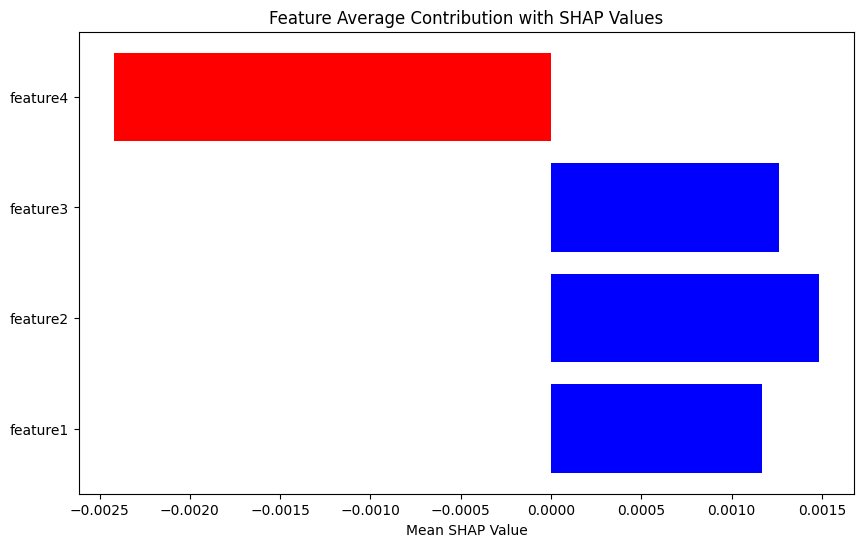

In [2]:
# Initialize the SHAP explainer
from explainers.mtsexpshap import MTSexpSHAP


shap_exp = MTSexpSHAP()
shap_exp.fit_exp(
    model=f_pred,
    loss=mse,
    feature_name_list=['feature1', 'feature2', 'feature3', 'feature4'],
    label_names=['feature2']
)

# Compute SHAP values
shap_values, perturbed_data = shap_exp.shap_values(y)

# Plot SHAP values
shap_exp.plot_shap_values(shap_values)

In [3]:
print("Shapley Values: ", shap_values)

Shapley Values:  [ 0.00116988  0.0014823   0.00126223 -0.00241905]


In [4]:
perturbed_data

array([[0.88111084, 0.92220003, 0.98899535, 1.000876  ],
       [0.11094449, 0.43131785, 0.13190634, 0.37639756],
       [0.98378824, 0.48096379, 0.26686022, 0.59855356],
       [0.50235363, 0.64386602, 0.71275243, 0.6997781 ],
       [0.37314337, 0.68241001, 0.38042418, 0.79099157],
       [0.71143697, 0.76710068, 1.02316114, 0.14243842],
       [0.40845886, 0.58502636, 0.69715357, 0.44465927],
       [0.52508681, 0.01136084, 0.05787499, 0.45802369],
       [0.88152426, 0.28857429, 1.00522954, 0.03240936],
       [0.13688331, 0.80931203, 0.33454557, 0.28721689]])

## MTSexpLIME

In [6]:
# Initialize the LIME explainer
from explainers.mtsexplime import MTSexpLIME


lime_exp = MTSexpLIME()
lime_exp.fit_exp(
    model=f_pred,
    loss=mse,
    features_list_names=['feature1', 'feature2', 'feature3', 'feature4'],
    labels_name=['feature2']
)

In [7]:
best_samples, best_samples_pred, distance_scores, mse_scores = lime_exp.blackbox_evaluation(y)

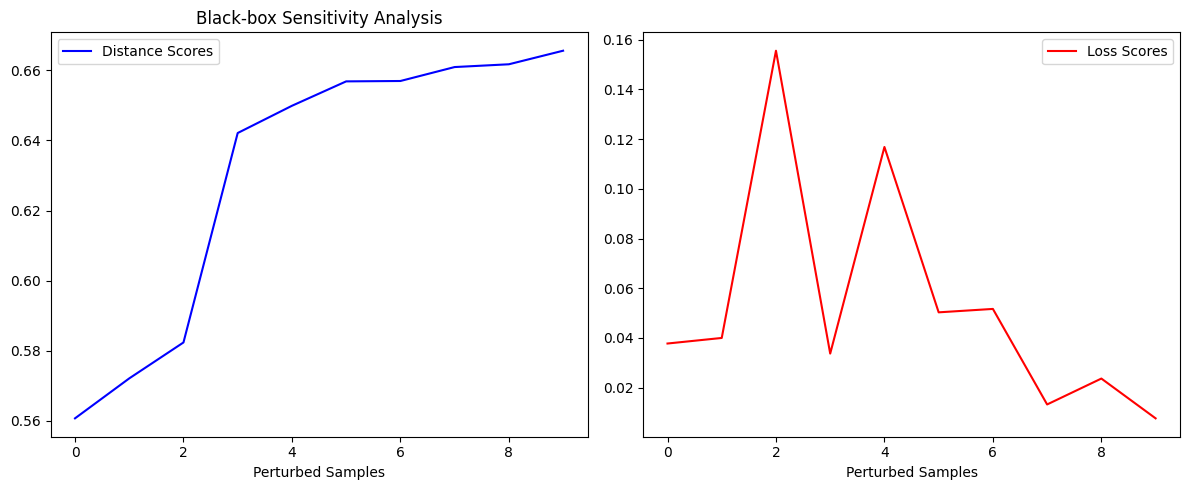

In [8]:
lime_exp.plot_blackbox_evaluation(distance_scores, mse_scores)

In [9]:
best_samples.shape

(10, 10, 4)

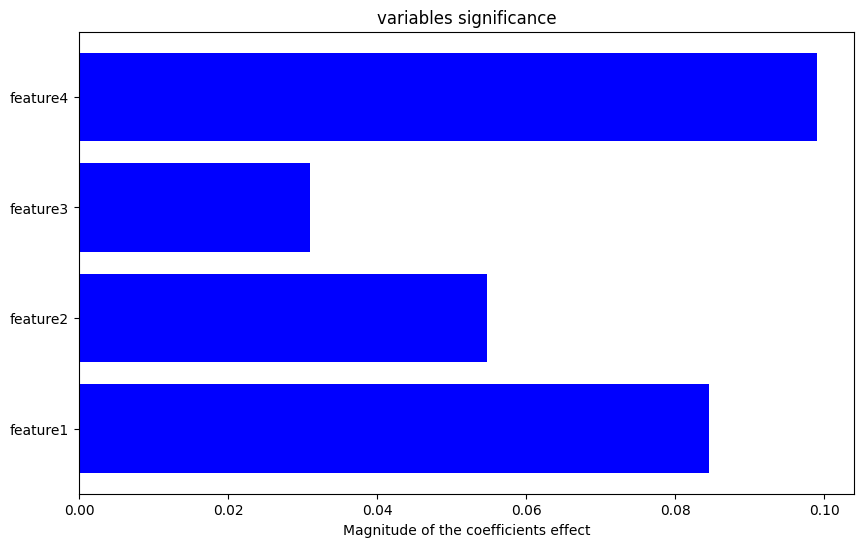

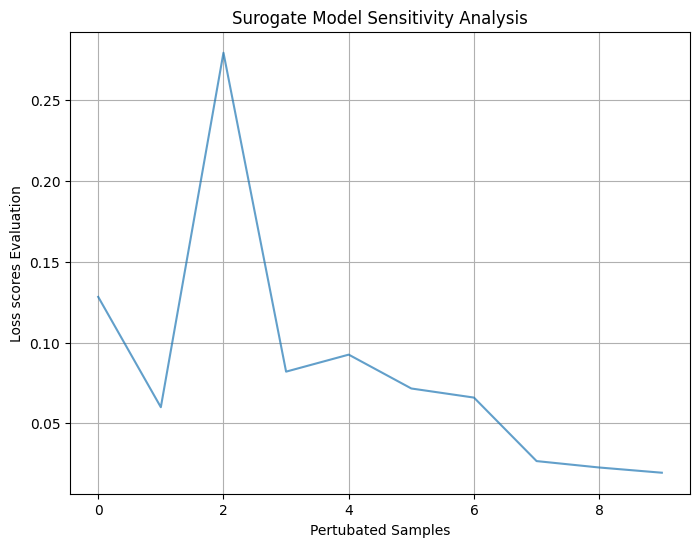

In [10]:
lime_exp.average_neighborhood_feature_effect(best_samples, best_samples_pred)